# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,186-11-114-A_CRR_DiadFit,103.931203,0.020270,1284.136058,0.018951,106.136420,1284.136058,307.554218,1.123759,2.018577,...,1.226119,0.413722,0.021176,1.080831,1.007874,0.121588,0.006453,PseudoVoigtModel,PseudoVoigtModel,No
1,186-11-114-B,103.782753,0.023629,1284.414901,0.021964,81.920505,1284.414901,217.385394,1.013899,1.628698,...,1.172775,0.220261,0.024753,1.012987,1.038523,0.019652,0.008744,PseudoVoigtModel,PseudoVoigtModel,No
2,186-11-116-A,103.600419,0.030154,1284.800906,0.028215,56.499161,1284.800906,129.049184,0.837116,1.501801,...,1.286595,0.185203,0.029633,1.107735,1.036538,0.135704,0.010630,PseudoVoigtModel,PseudoVoigtModel,No
3,186-11-116-B,103.825943,0.012689,1284.382341,0.011293,196.953096,1284.382341,544.995386,1.047494,2.669507,...,1.191763,0.361829,0.010637,1.087059,1.156794,0.126682,0.003361,PseudoVoigtModel,PseudoVoigtModel,No
4,186-11-116-C_CRR_DiadFit,103.905479,0.016533,1284.170118,0.015181,127.046088,1284.170118,366.829946,1.121840,1.958926,...,1.123662,0.168013,0.017660,1.017391,1.041139,0.027070,0.005528,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant'],
 sort=True)
diad_meta[0]

'004 FG04-A1-16-start-rep1.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 113/113 [00:00<00:00, 443.17it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-16-start-rep1.txt,"June 28, 2024\n",June,28.0,6.049,45.0,5.0,50.0,"['0h', '3m', '46s']",11:29:07 AM\n,41347.0,1324.964
1,FG04-A1-16-start-rep2.txt,"June 28, 2024\n",June,28.0,6.091,45.0,5.0,50.0,"['0h', '3m', '46s']",11:33:49 AM\n,41629.0,1324.964
2,FG04-A1-16-start-rep3.txt,"June 28, 2024\n",June,28.0,6.129,45.0,5.0,50.0,"['0h', '3m', '46s']",11:39:33 AM\n,41973.0,1324.964
3,FG04-A1-4-start-rep1.txt,"June 28, 2024\n",June,28.0,6.132,45.0,5.0,50.0,"['0h', '3m', '46s']",11:44:01 AM\n,42241.0,1324.964
4,FG04-A1-4-start-rep2.txt,"June 28, 2024\n",June,28.0,6.123,45.0,5.0,50.0,"['0h', '3m', '46s']",11:49:06 AM\n,42546.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-16-start-rep1'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-16-start-rep1', 'FG04-A1-16-start-rep2',
       'FG04-A1-16-start-rep3', 'FG04-A1-4-start-rep1',
       'FG04-A1-4-start-rep2', 'FG04-A1-4-start-rep3', '186-11-111-A',
       '186-11-111-B', '186-11-111-C', '186-11-111-D', '186-11-111-E',
       '186-11-111-F', '186-11-111-G', '186-11-112-A', '186-11-112-B',
       '186-11-113-A', '186-11-113-B', '186-11-113-C', '186-11-113-D',
       '186-11-114-A', '186-11-114-B', '186-11-116-A', '186-11-116-B',
       '186-11-116-C', '186-11-115-A', '186-11-115-B', '186-11-117-B',
       '186-11-117-C', '186-11-117-A', '186-11-117-D',
       'FG04-A1-16-end-rep4', 'FG04-A1-16-end-rep5',
       'FG04-A1-16-end-rep6', 'FG04-A1-4-end-rep4', 'FG04-A1-4-end-rep5',
       'FG04-A1-4-end-rep6'], dtype=object)

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
186-11-114-A


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['186-11-114-A', '186-11-114-B', '186-11-116-A', '186-11-116-B',
       '186-11-116-C', '186-11-115-B', '186-11-111-A', '186-11-111-B',
       '186-11-111-C', '186-11-111-D', '186-11-111-E', '186-11-111-F',
       '186-11-111-G', '186-11-112-A', '186-11-112-B', '186-11-113-A',
       '186-11-113-B', '186-11-113-C', '186-11-113-D', '186-11-115-A',
       '186-11-117-B', '186-11-117-C', '186-11-117-A', '186-11-117-D',
       'FG04-A1-16-start-rep1', 'FG04-A1-16-start-rep2',
       'FG04-A1-16-start-rep3', 'FG04-A1-4-start-rep1',
       'FG04-A1-4-start-rep2', 'FG04-A1-4-start-rep3',
       'FG04-A1-16-end-rep4', 'FG04-A1-16-end-rep5',
       'FG04-A1-16-end-rep6', 'FG04-A1-4-end-rep4', 'FG04-A1-4-end-rep5',
       'FG04-A1-4-end-rep6'], dtype='<U21')

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,186-11-114-A,103.931203,0.020270,1284.136058,0.018951,106.136420,1284.136058,307.554218,1.123759,2.018577,...,June,28.0,6.106,60.0,4.0,50.0,"['0h', '4m', '1s']",2:25:57 PM\n,51957.0,1324.964
1,186-11-114-B,103.782753,0.023629,1284.414901,0.021964,81.920505,1284.414901,217.385394,1.013899,1.628698,...,June,28.0,6.083,60.0,4.0,50.0,"['0h', '4m', '1s']",2:42:31 PM\n,52951.0,1324.964
2,186-11-116-A,103.600419,0.030154,1284.800906,0.028215,56.499161,1284.800906,129.049184,0.837116,1.501801,...,June,28.0,6.039,60.0,4.0,50.0,"['0h', '4m', '1s']",2:51:16 PM\n,53476.0,1324.964
3,186-11-116-B,103.825943,0.012689,1284.382341,0.011293,196.953096,1284.382341,544.995386,1.047494,2.669507,...,June,28.0,6.039,60.0,4.0,100.0,"['0h', '4m', '1s']",3:01:52 PM\n,54112.0,1324.964
4,186-11-116-C,103.905479,0.016533,1284.170118,0.015181,127.046088,1284.170118,366.829946,1.121840,1.958926,...,June,28.0,6.043,60.0,4.0,100.0,"['0h', '4m', '1s']",3:08:50 PM\n,54530.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

6.921956587863715e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,186-11-111-A,0.569704,0.004719,0.004083,0.002365,104.082894,0.008513,0.000704,0.008501,5.997,...,45569.0,NaN,NaN,NaN,NaN,NaN,45569.0,0.997934,0.997927,0.997941
1,186-11-111-B,0.582668,0.003056,0.001932,0.002367,104.109835,0.004002,0.000702,0.003948,6.011,...,45987.0,NaN,NaN,NaN,NaN,NaN,45987.0,0.997934,0.997927,0.997940
2,186-11-111-C,0.565958,0.004747,0.004116,0.002364,104.075076,0.008597,0.000701,0.008586,6.036,...,46309.0,NaN,NaN,NaN,NaN,NaN,46309.0,0.997933,0.997927,0.997940
3,186-11-111-D,0.588655,0.003061,0.001939,0.002368,104.122219,0.004005,0.000700,0.003951,6.050,...,46613.0,NaN,NaN,NaN,NaN,NaN,46613.0,0.997933,0.997926,0.997940
4,186-11-111-E,0.558858,0.002891,0.001665,0.002363,104.060221,0.003489,0.000699,0.003426,6.052,...,46992.0,NaN,NaN,NaN,NaN,NaN,46992.0,0.997933,0.997926,0.997939


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

6.921956587863715e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,186-11-111-A,0.569704,0.004719,0.004083,0.002365,104.082894,0.008513,0.000704,0.008501,5.997,...,45569.0,NaN,NaN,NaN,NaN,NaN,45569.0,0.997934,0.997927,0.997941
1,186-11-111-B,0.582668,0.003056,0.001932,0.002367,104.109835,0.004002,0.000702,0.003948,6.011,...,45987.0,NaN,NaN,NaN,NaN,NaN,45987.0,0.997934,0.997927,0.997940
2,186-11-111-C,0.565958,0.004747,0.004116,0.002364,104.075076,0.008597,0.000701,0.008586,6.036,...,46309.0,NaN,NaN,NaN,NaN,NaN,46309.0,0.997933,0.997927,0.997940
3,186-11-111-D,0.588655,0.003061,0.001939,0.002368,104.122219,0.004005,0.000700,0.003951,6.050,...,46613.0,NaN,NaN,NaN,NaN,NaN,46613.0,0.997933,0.997926,0.997940
4,186-11-111-E,0.558858,0.002891,0.001665,0.002363,104.060221,0.003489,0.000699,0.003426,6.052,...,46992.0,NaN,NaN,NaN,NaN,NaN,46992.0,0.997933,0.997926,0.997939


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_June 28, 2024_fitted_2024-07-08.xlsx


## This helps visualize the errors on each spectra 

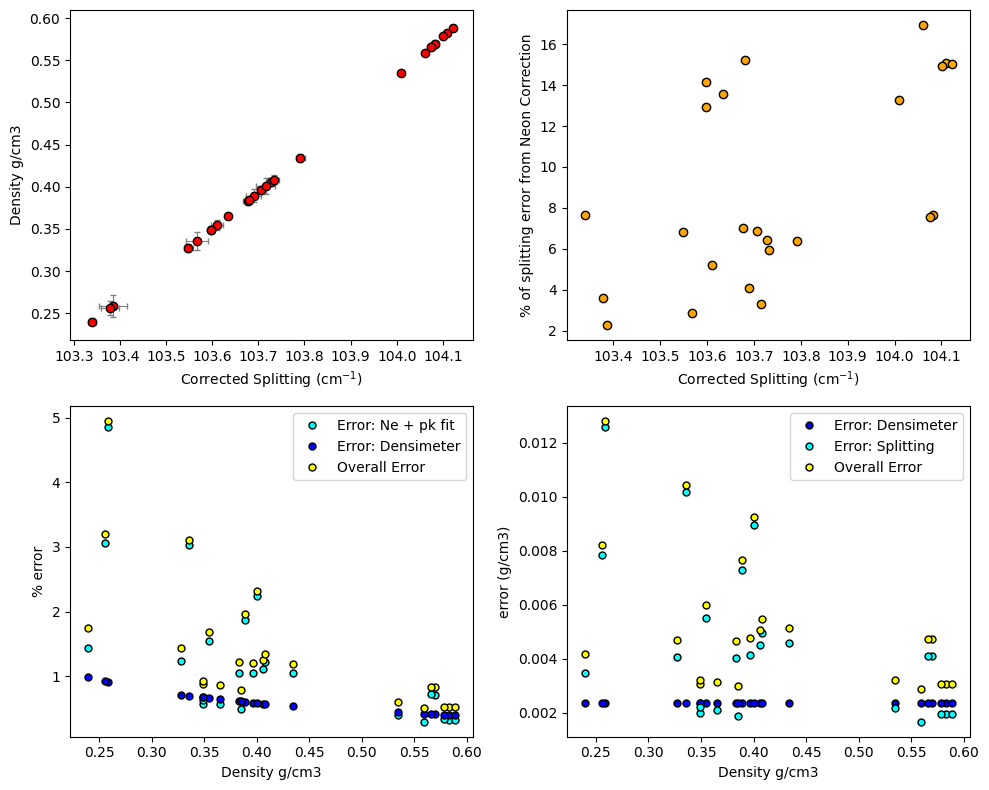

In [16]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## lets look at standards


Text(0, 0.5, 'Density g/cm3')

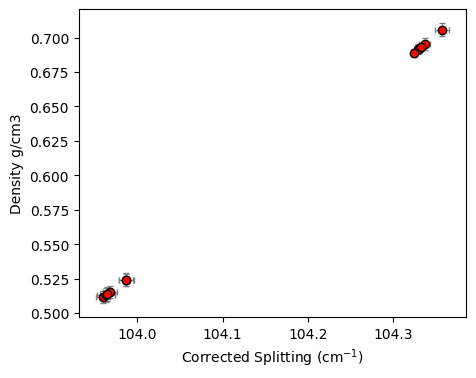

In [17]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [18]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

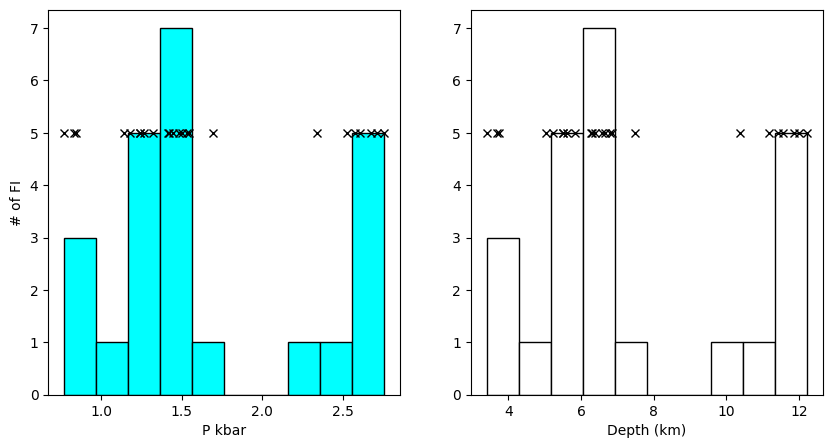

In [19]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')